<a href="https://colab.research.google.com/github/Shivp55/-Mental-Health-Data-Analysis-Project/blob/main/ML_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load the data files
electricity_2023 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Electricity Usage 2023.csv')
electricity_2024 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Electricity Usage 2024.csv')
gas_2023 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Gas Usage 2023.csv')
gas_2024 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Gas Usage 2024.csv')

# # Inspect the structure of one file
# gas_2023.head(), gas_2024.head()

gas_2023.describe(), gas_2024.describe()

(       Values       00:00       00:15       00:30       00:45       01:00  \
 count   365.0  365.000000  365.000000  365.000000  364.000000  364.000000   
 mean     96.0    2.501370    3.224658    2.772603    2.568681    3.203297   
 std       0.0    6.921707    8.544579    8.331412    7.329190    9.221928   
 min      96.0    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%      96.0    0.000000    0.000000    0.000000    0.000000    0.000000   
 50%      96.0    0.000000    0.000000    0.000000    0.000000    0.000000   
 75%      96.0    0.000000    0.000000    0.000000    0.000000    0.000000   
 max      96.0   33.000000   44.000000   88.000000   55.000000   88.000000   
 
             01:15       01:30       01:45       02:00  ...       21:30  \
 count  364.000000  364.000000  365.000000  365.000000  ...  365.000000   
 mean     2.810440    2.689560    2.863014    3.947945  ...    2.471233   
 std      7.466347    7.193493    7.698143   13.619234  ...    6.956487

In [ ]:
# Define the function to clean data
def clean_data(df, time_columns):
    # Step 1: Replace NaN values with row average if the row contains other non-NaN values
    df[time_columns] = df[time_columns].apply(
        lambda row: row.fillna(row.mean()) if not row.isnull().all() else row, axis=1
    )
    # Step 2: Drop rows where all time columns are NaN
    df_cleaned = df.dropna(subset=time_columns, how='all')
    return df_cleaned

# Apply the function to each dataset
time_columns = electricity_2023.columns[2:]  # Adjust if time columns start from the 3rd column

electricity_2023 = clean_data(electricity_2023, time_columns)
electricity_2024 = clean_data(electricity_2024, time_columns)
gas_2023 = clean_data(gas_2023, time_columns)
gas_2024 = clean_data(gas_2024, time_columns)

# Assign cleaned data to new variables
df_electricity_2023 = electricity_2023
df_electricity_2024 = electricity_2024
df_gas_2023 = gas_2023
df_gas_2024 = gas_2024


In [ ]:
electricity_2023.tail()

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
360,27/12/2023,96,24.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,26.0,25.0,26.0,26.0,25.0,26.0,26.0,25.0,26.0,25.0
361,28/12/2023,96,26.0,26.0,26.0,25.0,26.0,26.0,26.0,27.0,...,28.0,28.0,28.0,28.0,29.0,29.0,28.0,29.0,28.0,28.0
362,29/12/2023,96,29.0,28.0,29.0,29.0,29.0,29.0,29.0,29.0,...,29.0,28.0,28.0,30.0,28.0,28.0,29.0,28.0,28.0,28.0
363,30/12/2023,96,29.0,28.0,29.0,27.0,28.0,28.0,29.0,28.0,...,27.0,26.0,27.0,26.0,26.0,27.0,26.0,27.0,27.0,26.0
364,31/12/2023,96,27.0,28.0,27.0,27.0,27.0,27.0,26.0,27.0,...,27.0,26.0,27.0,27.0,27.0,26.0,26.0,26.0,26.0,27.0


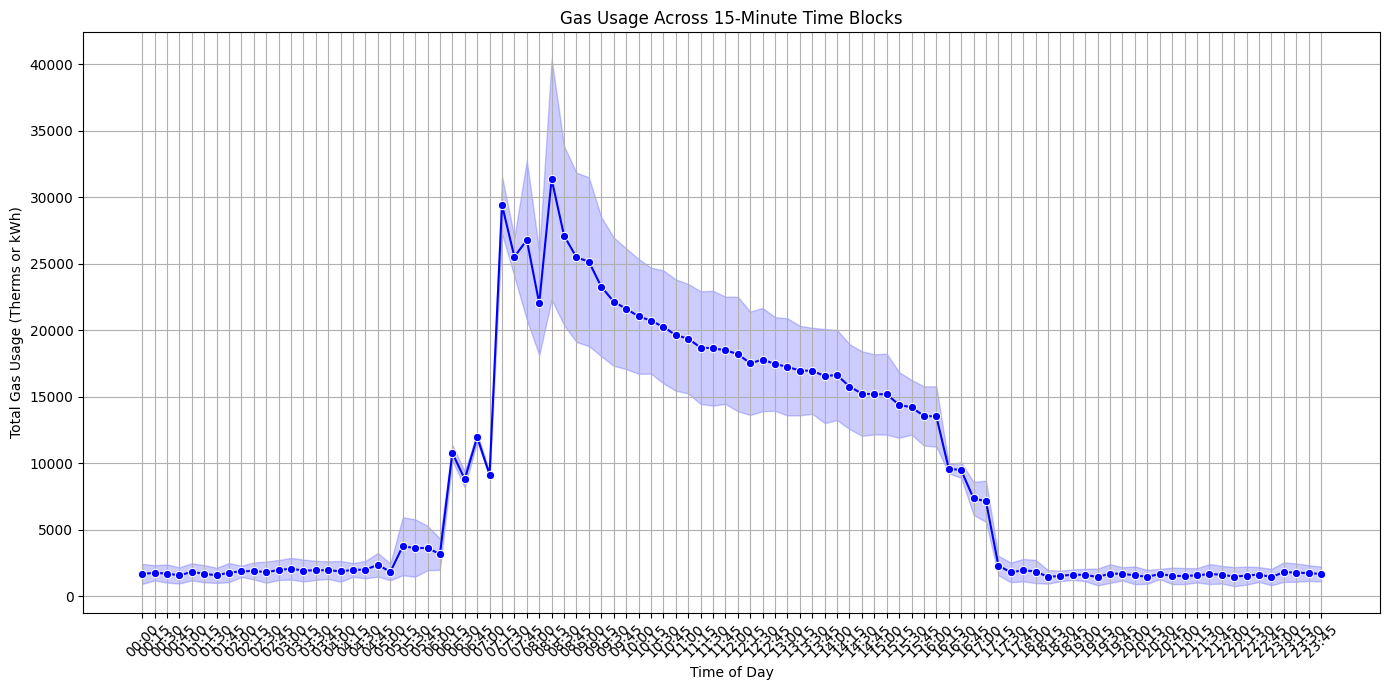

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to aggregate and sum gas usage by time block
def aggregate_usage(df, time_columns):
    # Sum the usage across all rows for each time block
    time_block_usage = df[time_columns].sum().reset_index()
    time_block_usage.columns = ['Time Block', 'Total Usage']
    # Convert 'Time Block' to a proper time format for sorting
    time_block_usage['Time Block'] = pd.to_datetime(time_block_usage['Time Block'], format='%H:%M').dt.strftime('%H:%M')

    # Sort by time block to ensure chronological order
    time_block_usage.sort_values('Time Block', inplace=True)

    return time_block_usage

# Aggregate gas usage data for 2023 and 2024
gas_usage_2023 = aggregate_usage(df_gas_2023, time_columns)
gas_usage_2024 = aggregate_usage(df_gas_2024, time_columns)

# Create a combined DataFrame for gas usage
gas_usage = pd.concat([gas_usage_2023, gas_usage_2024], ignore_index=True)
gas_usage['Type'] = 'Gas'  # Add a column to label the data as 'Gas'

# Plotting the gas usage data
plt.figure(figsize=(14, 7))
sns.lineplot(data=gas_usage, x='Time Block', y='Total Usage', marker='o', color='blue')

# Adding plot details
plt.title('Gas Usage Across 15-Minute Time Blocks')
plt.xlabel('Time of Day')
plt.ylabel('Total Gas Usage (Therms or kWh)')  # Adjust the unit based on your data
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


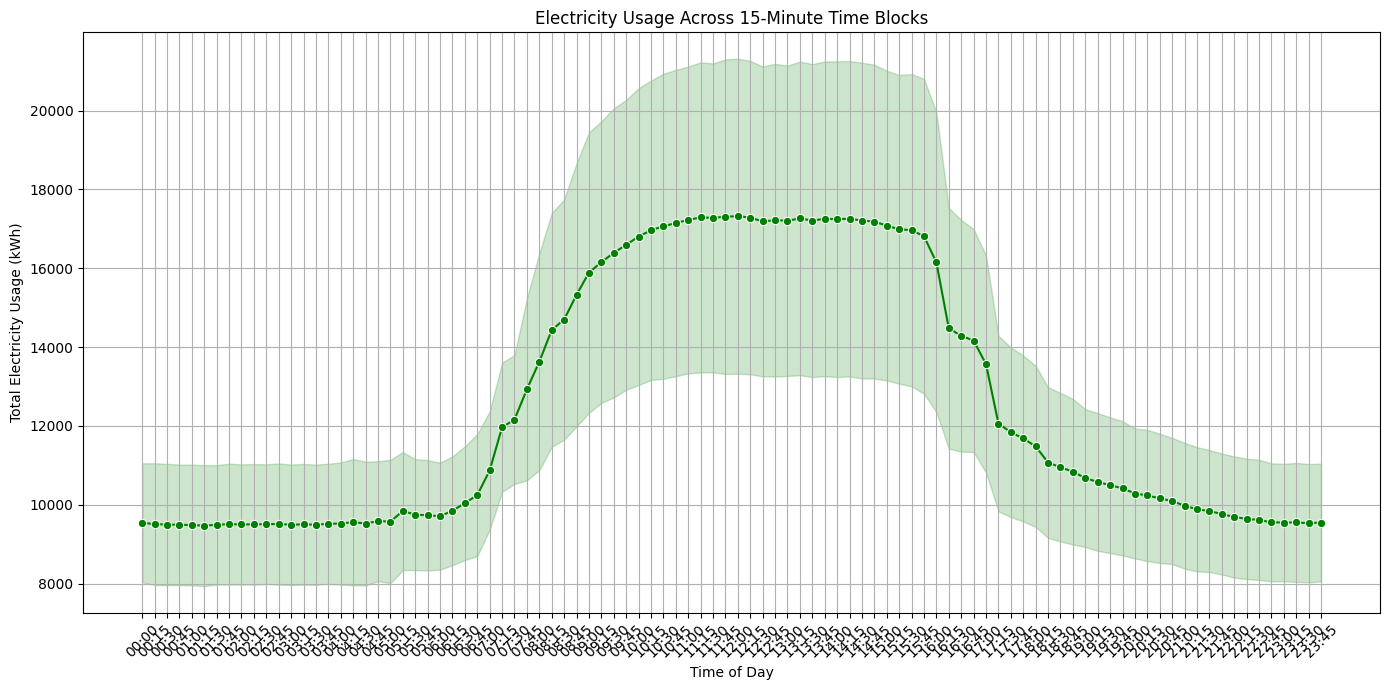

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to aggregate and sum electricity usage by time block
def aggregate_usage(df, time_columns):
    # Sum the usage across all rows for each time block
    time_block_usage = df[time_columns].sum().reset_index()
    time_block_usage.columns = ['Time Block', 'Total Usage']

    # Convert 'Time Block' to a proper time format for sorting
    time_block_usage['Time Block'] = pd.to_datetime(time_block_usage['Time Block'], format='%H:%M').dt.strftime('%H:%M')

    # Sort by time block to ensure chronological order
    time_block_usage.sort_values('Time Block', inplace=True)
    # Sum the usage across each hour (group by 'Hour')
    hourly_usage = df.groupby('Hour')[time_columns].sum().sum(axis=1).reset_index()
    hourly_usage.columns = ['Hour', 'Total Usage']

    return time_block_usage

# Aggregate electricity usage data for 2023 and 2024
electricity_usage_2023 = aggregate_usage(df_electricity_2023, time_columns)
electricity_usage_2024 = aggregate_usage(df_electricity_2024, time_columns)

# Create a combined DataFrame for electricity usage
electricity_usage = pd.concat([electricity_usage_2023, electricity_usage_2024], ignore_index=True)
electricity_usage['Type'] = 'Electricity'  # Add a column to label the data as 'Electricity'

# Plotting the electricity usage data
plt.figure(figsize=(14, 7))
sns.lineplot(data=electricity_usage, x='Time Block', y='Total Usage', marker='o', color='green')

# Adding plot details
plt.title('Electricity Usage Across 15-Minute Time Blocks')
plt.xlabel('Time of Day')
plt.ylabel('Total Electricity Usage (kWh)')  # Adjust the unit based on your data
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


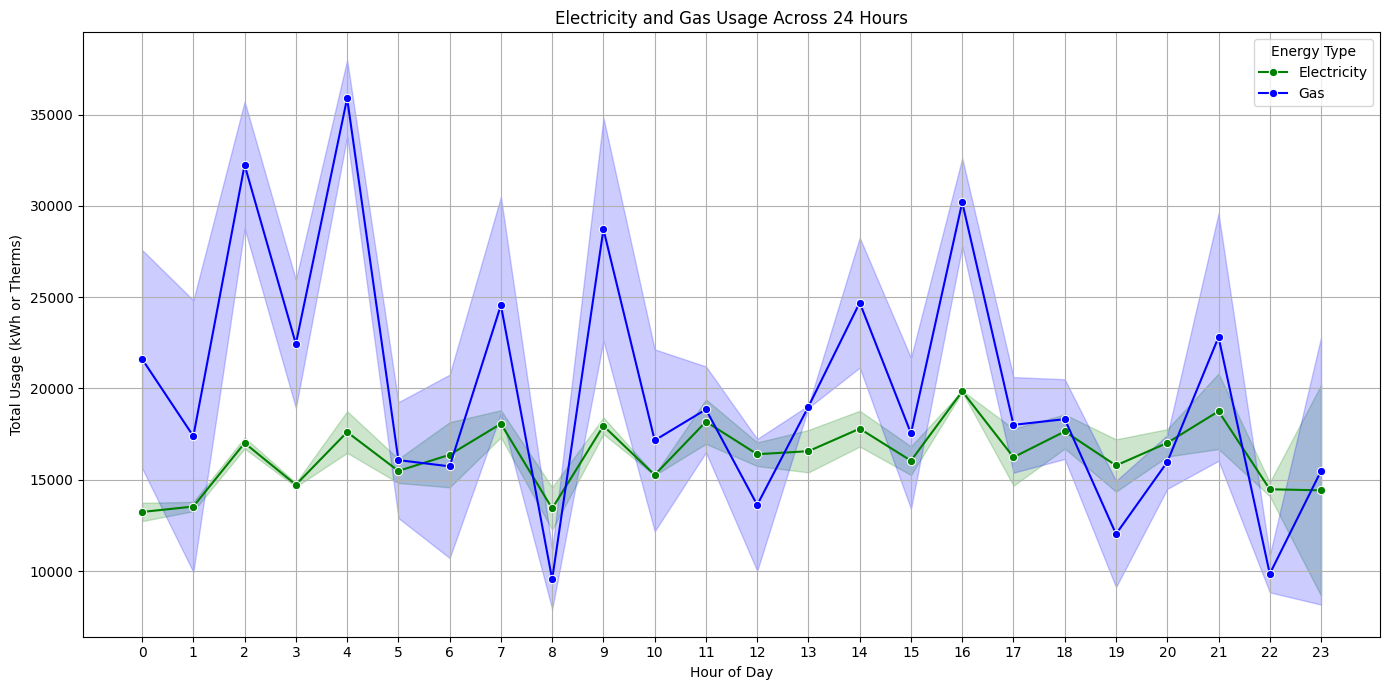

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to aggregate usage by hour from 15-minute intervals
def aggregate_to_hourly(df, time_columns):
    # First, ensure the 'Time Block' is in a datetime format
    time_block_usage = df[time_columns].sum().reset_index()
    time_block_usage.columns = ['Time Block', 'Total Usage']

    df['Hour'] = pd.to_datetime(time_block_usage['Time Block'], format='%H:%M').dt.strftime('%H').astype(int)

    # Sum the usage across each hour (group by 'Hour')
    hourly_usage = df.groupby('Hour')[time_columns].sum().sum(axis=1).reset_index()
    hourly_usage.columns = ['Hour', 'Total Usage']

    return hourly_usage

# Aggregate electricity usage data to hourly totals
electricity_usage_hourly_2023 = aggregate_to_hourly(df_electricity_2023, time_columns)
electricity_usage_hourly_2024 = aggregate_to_hourly(df_electricity_2024, time_columns)

# Combine both years of electricity usage
electricity_usage_hourly = pd.concat([electricity_usage_hourly_2023, electricity_usage_hourly_2024], ignore_index=True)

# Aggregate gas usage data to hourly totals
gas_usage_hourly_2023 = aggregate_to_hourly(df_gas_2023, time_columns)
gas_usage_hourly_2024 = aggregate_to_hourly(df_gas_2024, time_columns)

# Combine both years of gas usage
gas_usage_hourly = pd.concat([gas_usage_hourly_2023, gas_usage_hourly_2024], ignore_index=True)

# Plotting the hourly data for both electricity and gas usage
plt.figure(figsize=(14, 7))

# Plot electricity usage (green color)
sns.lineplot(data=electricity_usage_hourly, x='Hour', y='Total Usage', label='Electricity', marker='o', color='green')

# Plot gas usage (blue color)
sns.lineplot(data=gas_usage_hourly, x='Hour', y='Total Usage', label='Gas', marker='o', color='blue')

# Adding plot details
plt.title('Electricity and Gas Usage Across 24 Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Usage (kWh or Therms)')  # Adjust units based on data
plt.grid(True)
plt.xticks(range(24))  # Displaying hours of the day
plt.tight_layout()
plt.legend(title='Energy Type')

# Show the plot
plt.show()


In [ ]:
#Visualizing the month based trend
import pandas as pd

def process_datasets(datasets):
    # A list to store the processed dataframes
    processed_dfs = []

    for df in datasets:
        # Step 1: Remove the second column (Values column)
        df = df.drop(df.columns[1], axis=1)

        # Step 2: Ensure that only numeric columns are selected (excluding the Date column)
        numeric_df = df.select_dtypes(include=['number'])

        # Step 3: Sum all the numeric columns (time interval columns)
        df['total_units'] = numeric_df.sum(axis=1)

        # Step 4: Keep only the Date column and the total_units column
        df_total_units = df[['Date', 'total_units']]

        # Step 5: Drop rows where 'total_units' is 0
        df_total_units = df_total_units[df_total_units['total_units'] != 0]

        # Append the processed dataframe to the list
        processed_dfs.append(df_total_units)

    return processed_dfs

# Example usage:
# Assuming df1, df2, df3, df4 are your datasets
datasets = [df_electricity_2023, df_electricity_2024, df_gas_2023, df_gas_2024]
processed_datasets = process_datasets(datasets)

# Cleaned and Processed datasets
cleaned_df1_electricity_2023 = processed_datasets[0]
cleaned_df2_electricity_2024 = processed_datasets[1]
cleaned_df3_gas_2023 = processed_datasets[2]
cleaned_df4_gas_2024 = processed_datasets[3]

# Display information about each processed dataset
cleaned_df1_electricity_2023.info()
cleaned_df2_electricity_2024.info()
cleaned_df3_gas_2023.info()
cleaned_df4_gas_2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   total_units  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         236 non-null    object 
 1   total_units  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         342 non-null    object 
 1   total_units  342 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
<class 'pandas.core.frame.DataFrame'>


In [ ]:

def describe_multiple_datasets(datasets, labels):
    description_dict = {}

    for df, label in zip(datasets, labels):
        description_dict[label] = df.describe()

    return description_dict

# List of your datasets
datasets = [cleaned_df1_electricity_2023, cleaned_df2_electricity_2024, cleaned_df3_gas_2023, cleaned_df4_gas_2024]

# Labels to identify the datasets
labels = ['Electricity 2023', 'Electricity 2024', 'Gas 2023', 'Gas 2024']

# Get the descriptions of all datasets
dataset_descriptions = describe_multiple_datasets(datasets, labels)

# Print the descriptions for all datasets
for label, description in dataset_descriptions.items():
    print(f"Description for {label}:\n")
    print(description)
    print("\n" + "="*50 + "\n")



Description for Electricity 2023:

       total_units
count   365.000000
mean   3935.414127
std     832.444590
min     608.000000
25%    3043.705263
50%    4320.000000
75%    4565.000000
max    5139.000000


Description for Electricity 2024:

       total_units
count   236.000000
mean   4121.369966
std     701.103560
min    2214.000000
25%    3473.750000
50%    4368.500000
75%    4598.250000
max    5288.000000


Description for Gas 2023:

        total_units
count    342.000000
mean    2900.212874
std     2743.695279
min       10.000000
25%      682.250000
50%     1683.000000
75%     5108.000000
max    11730.157895


Description for Gas 2024:

        total_units
count    225.000000
mean    3429.870619
std     2947.375187
min        8.000000
25%     1078.000000
50%     2079.000000
75%     5544.000000
max    11719.000000




In [ ]:
cleaned_df2_electricity_2024

,Date,total_units
0,01/01/2024,2781.978947
1,02/01/2024,3213.473684
2,03/01/2024,3763.200000
3,04/01/2024,3979.452632
4,05/01/2024,3830.905263
...,...,...
231,19/08/2024,4382.000000
232,20/08/2024,4417.000000
233,21/08/2024,4461.000000
234,22/08/2024,4529.000000


In [ ]:
def process_monthly_units_2023(df):
    """
    Processes the dataframe to group total units by month and year.
    """
    # Step 1: Ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    # Step 2: Extract the month and year from the 'Date' column
    df['Month'] = df['Date'].dt.month  # Numeric month (1 = January, 2 = February, etc.)
    df['Year'] = df['Date'].dt.year  # Extract the year

    # Step 3: Group by the 'Year' and 'Month' columns and sum the 'total_units' for each month
    monthly_units = df.groupby(['Year', 'Month'], as_index=False)['total_units'].sum()

    # Step 4: Sort by 'Year' and 'Month' to get the months in chronological order
    monthly_units = monthly_units.sort_values(by=['Year', 'Month'])

    # Step 5: Create a new 'Date' column with the month name and year
    monthly_units['Months_2023'] = monthly_units['Month'].apply(lambda x: pd.to_datetime(f"{x}-1-2020").strftime('%B'))

    # Step 6: Drop the 'Year' and 'Month' columns
    monthly_units = monthly_units[['Months_2023', 'total_units']]

    return monthly_units

# Process each dataset separately
monthly_electricity_2023 = process_monthly_units_2023(cleaned_df1_electricity_2023)
monthly_gas_2023 = process_monthly_units_2023(cleaned_df3_gas_2023)

monthly_electricity_2023.head()

,Months_2023,total_units
0,January,122195.715789
1,February,117274.000000
2,March,127547.894737
3,April,101871.014519
4,May,117395.000000


In [ ]:
def process_monthly_units_2024(df):
    """
    Processes the dataframe to group total units by month and year.
    """
    # Step 1: Ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    # Step 2: Extract the month and year from the 'Date' column
    df['Month'] = df['Date'].dt.month  # Numeric month (1 = January, 2 = February, etc.)
    df['Year'] = df['Date'].dt.year  # Extract the year

    # Step 3: Group by the 'Year' and 'Month' columns and sum the 'total_units' for each month
    monthly_units = df.groupby(['Year', 'Month'], as_index=False)['total_units'].sum()

    # Step 4: Sort by 'Year' and 'Month' to get the months in chronological order
    monthly_units = monthly_units.sort_values(by=['Year', 'Month'])

    # Step 5: Create a new 'Date' column with the month name and year
    monthly_units['Months_2024'] = monthly_units['Month'].apply(lambda x: pd.to_datetime(f"{x}-1-2020").strftime('%B'))

    # Step 6: Drop the 'Year' and 'Month' columns
    monthly_units = monthly_units[['Months_2024', 'total_units']]

    return monthly_units

# Process each dataset separately
monthly_electricity_2024 = process_monthly_units_2024(cleaned_df2_electricity_2024)
monthly_gas_2024 = process_monthly_units_2024(cleaned_df4_gas_2024)

monthly_electricity_2024.head()

,Months_2024,total_units
0,January,120444.568421
1,February,118771.347368
2,March,139854.000000
3,April,131134.000000
4,May,125156.000000


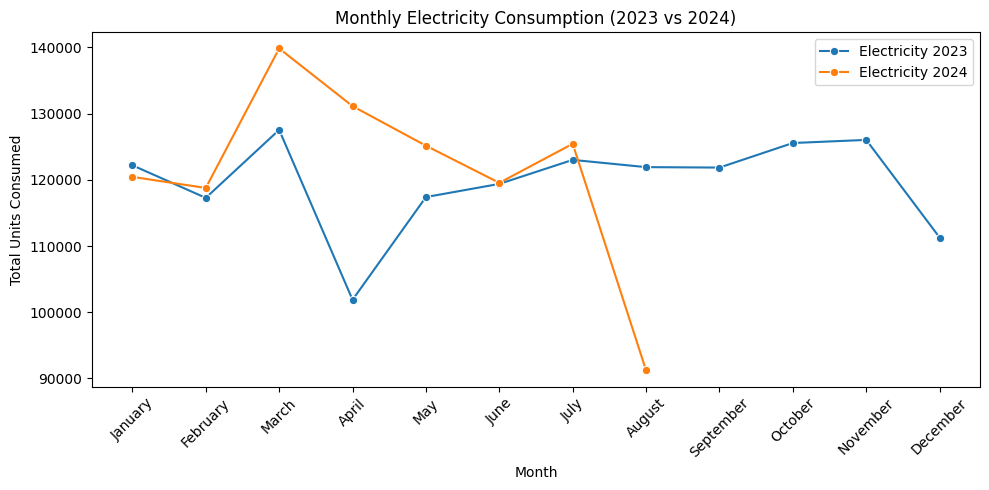

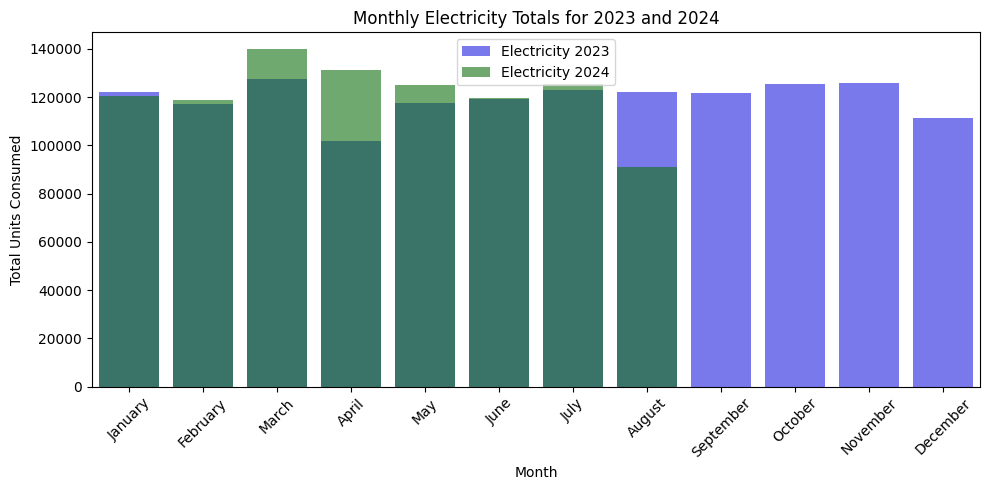

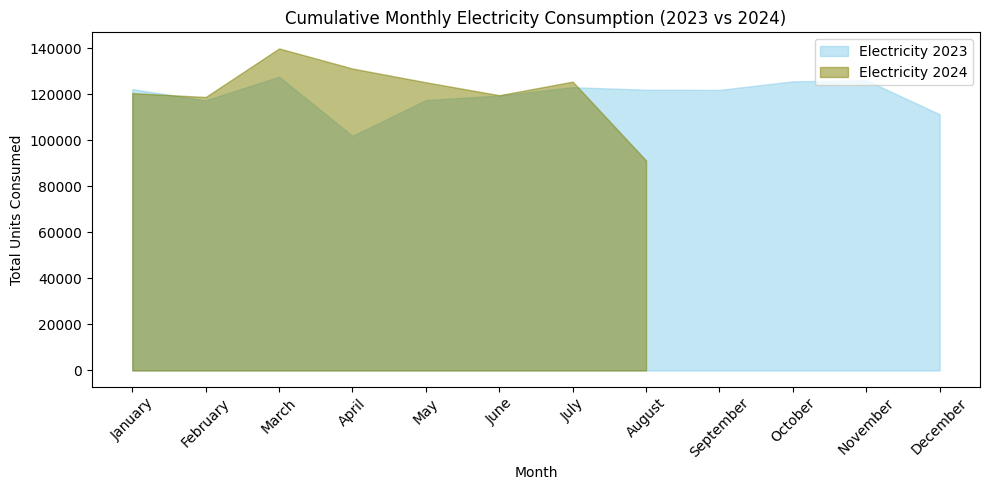

In [ ]:


# Line Plot for Monthly Electricity Consumption Comparison (2023 vs 2024)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_electricity_2023, x='Months_2023', y='total_units', label='Electricity 2023', marker='o')
sns.lineplot(data=monthly_electricity_2024, x='Months_2024', y='total_units', label='Electricity 2024', marker='o')
plt.title('Monthly Electricity Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar Plot for Monthly Electricity Totals in 2023 and 2024
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_electricity_2023, x='Months_2023', y='total_units', color='blue', alpha=0.6, label='Electricity 2023')
sns.barplot(data=monthly_electricity_2024, x='Months_2024', y='total_units', color='green', alpha=0.6, label='Electricity 2024')
plt.title('Monthly Electricity Totals for 2023 and 2024')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Area Plot for Cumulative Monthly Electricity Consumption (2023 vs 2024)
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_electricity_2023['Months_2023'], monthly_electricity_2023['total_units'], color="skyblue", alpha=0.5, label='Electricity 2023')
plt.fill_between(monthly_electricity_2024['Months_2024'], monthly_electricity_2024['total_units'], color="olive", alpha=0.5, label='Electricity 2024')
plt.title('Cumulative Monthly Electricity Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



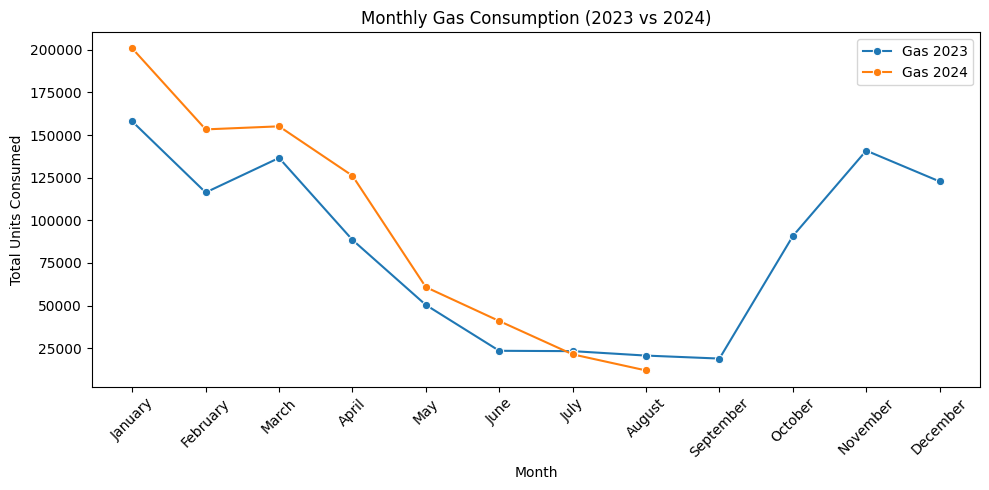

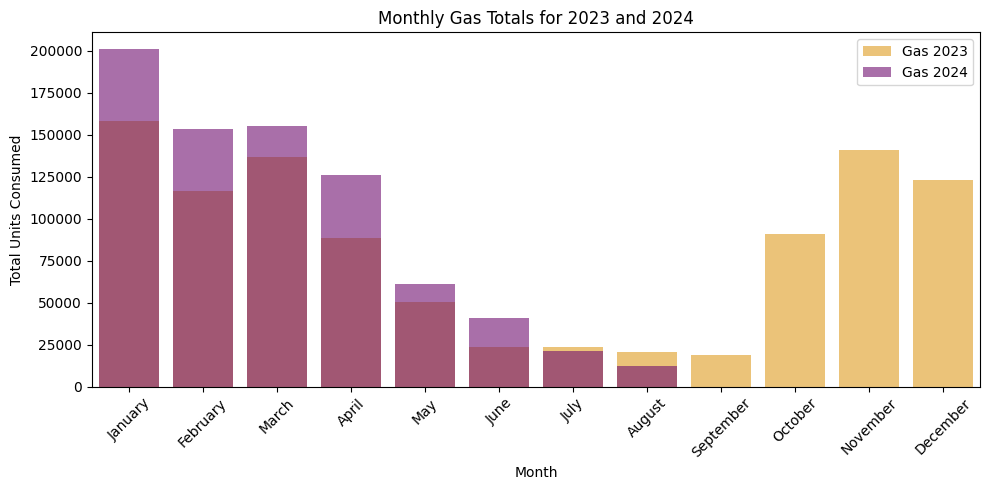

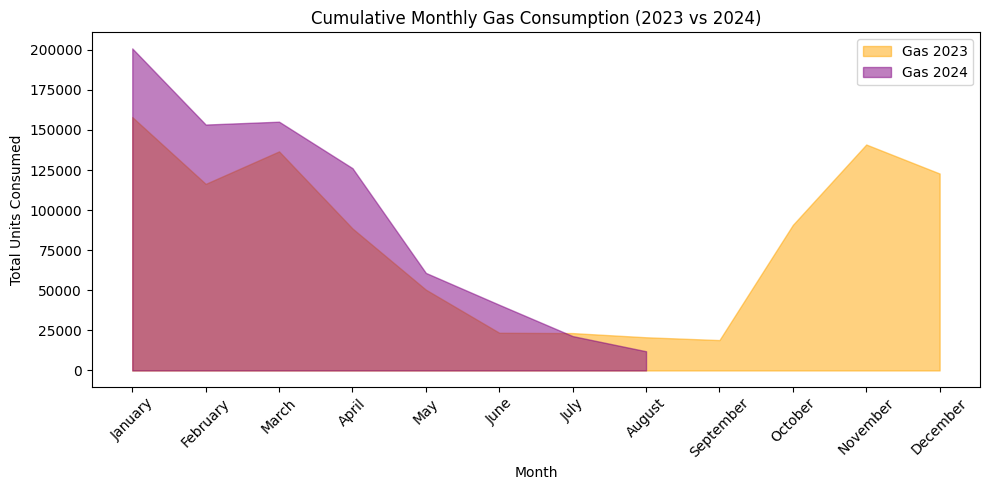

In [ ]:

# Line Plot for Monthly Gas Consumption Comparison (2023 vs 2024)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_gas_2023, x='Months_2023', y='total_units', label='Gas 2023', marker='o')
sns.lineplot(data=monthly_gas_2024, x='Months_2024', y='total_units', label='Gas 2024', marker='o')
plt.title('Monthly Gas Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar Plot for Monthly Gas Totals in 2023 and 2024
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_gas_2023, x='Months_2023', y='total_units', color='orange', alpha=0.6, label='Gas 2023')
sns.barplot(data=monthly_gas_2024, x='Months_2024', y='total_units', color='purple', alpha=0.6, label='Gas 2024')
plt.title('Monthly Gas Totals for 2023 and 2024')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Area Plot for Cumulative Monthly Gas Consumption (2023 vs 2024)
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_gas_2023['Months_2023'], monthly_gas_2023['total_units'], color="orange", alpha=0.5, label='Gas 2023')
plt.fill_between(monthly_gas_2024['Months_2024'], monthly_gas_2024['total_units'], color="purple", alpha=0.5, label='Gas 2024')
plt.title('Cumulative Monthly Gas Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



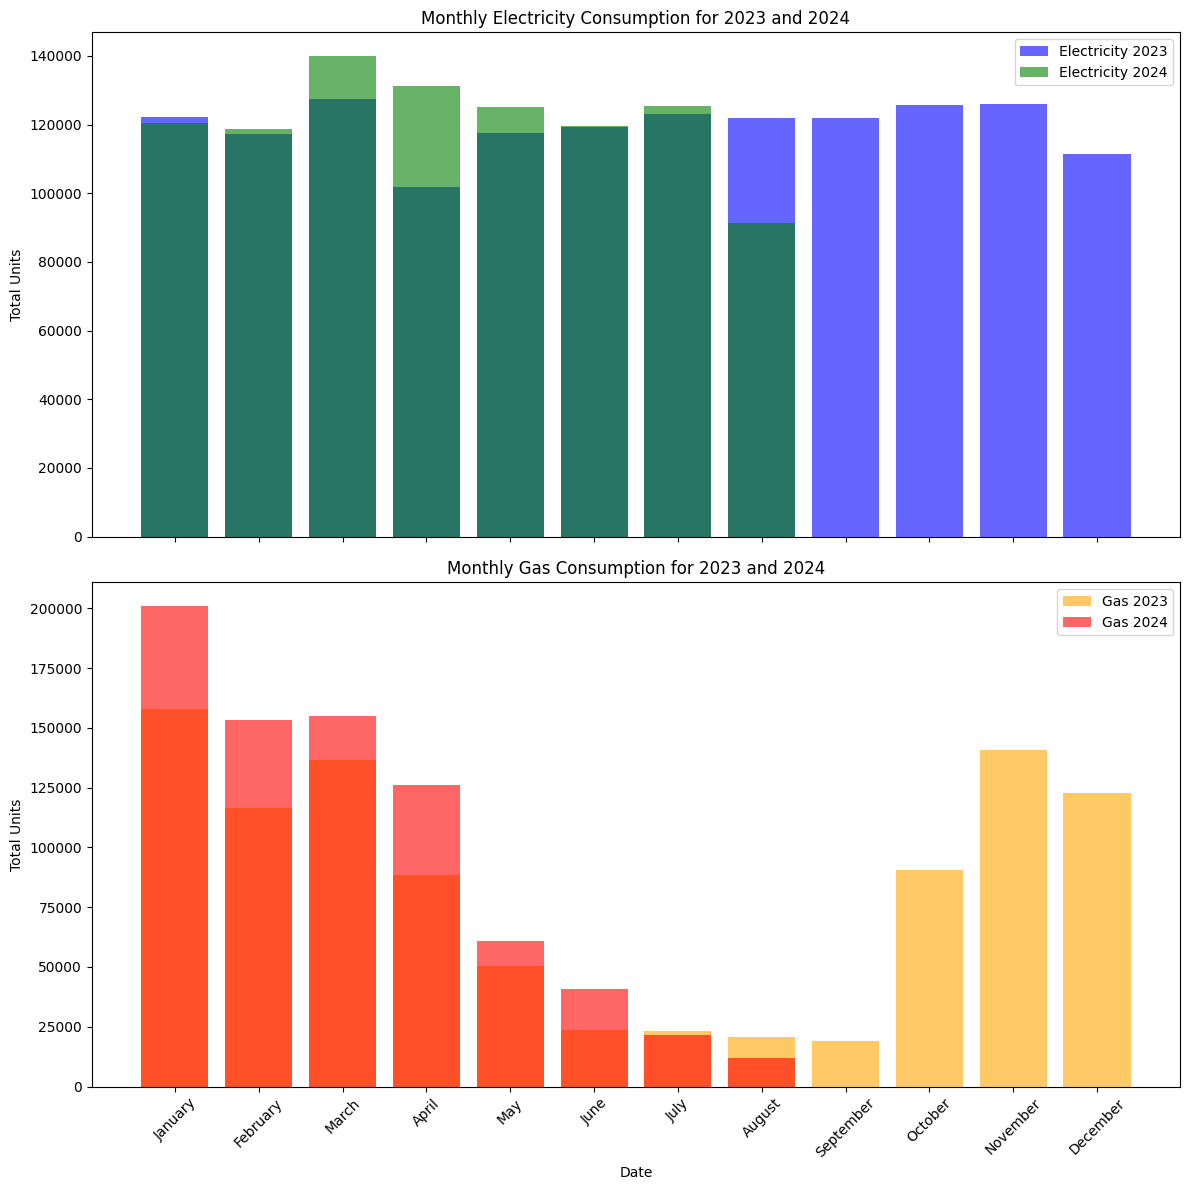

In [ ]:
# Bar Plot: Monthly Totals Comparison for Electricity and Gas in 2023 vs 2024
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Electricity
axes[0].bar(monthly_electricity_2023['Months_2023'], monthly_electricity_2023['total_units'], color='blue', label='Electricity 2023', alpha=0.6)
axes[0].bar(monthly_electricity_2024['Months_2024'], monthly_electricity_2024['total_units'], color='green', label='Electricity 2024', alpha=0.6)
axes[0].set_title('Monthly Electricity Consumption for 2023 and 2024')
axes[0].legend()
axes[0].set_ylabel('Total Units')

# Gas
axes[1].bar(monthly_gas_2023['Months_2023'], monthly_gas_2023['total_units'], color='orange', label='Gas 2023', alpha=0.6)
axes[1].bar(monthly_gas_2024['Months_2024'], monthly_gas_2024['total_units'], color='red', label='Gas 2024', alpha=0.6)
axes[1].set_title('Monthly Gas Consumption for 2023 and 2024')
axes[1].legend()
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Units')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


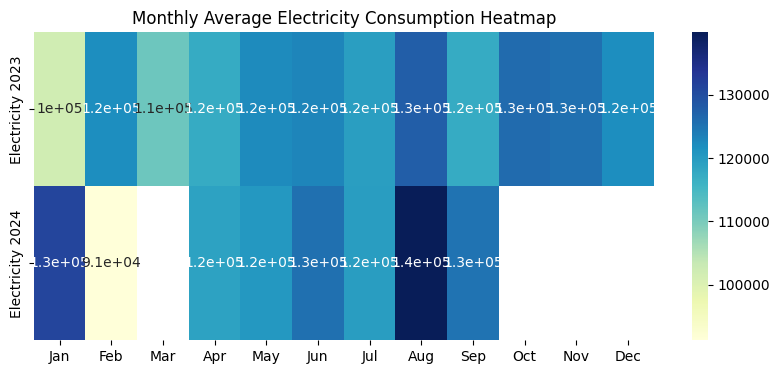

In [ ]:
# Reshape data to create monthly averages (assuming daily data in each dataframe)
electricity_2023_pivot = monthly_electricity_2023.pivot_table(index=monthly_electricity_2023['Months_2023'], values='total_units', aggfunc='mean')
electricity_2024_pivot = monthly_electricity_2024.pivot_table(index=monthly_electricity_2024['Months_2024'], values='total_units', aggfunc='mean')
gas_2023_pivot = monthly_gas_2023.pivot_table(index=monthly_gas_2023['Months_2023'], values='total_units', aggfunc='mean')
gas_2024_pivot = monthly_gas_2024.pivot_table(index=monthly_gas_2024['Months_2024'], values='total_units', aggfunc='mean')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reindex the 2024 data to match the index of 2023 data (12 months)
electricity_2024_pivot = electricity_2024_pivot.reindex(electricity_2023_pivot.index, fill_value=np.nan) # Fill missing months with NaN
gas_2024_pivot = gas_2024_pivot.reindex(gas_2023_pivot.index, fill_value=np.nan) # Fill missing months with NaN


# Create a 2D array for electricity data (2 rows: 2023 and 2024, 12 columns: months)
electricity_data = [
    electricity_2023_pivot.values.flatten(),
    electricity_2024_pivot.values.flatten()
]

# Heatmap for Electricity Consumption (2023 and 2024)
plt.figure(figsize=(10, 4))
sns.heatmap(electricity_data, annot=True, cmap="YlGnBu", xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], yticklabels=['Electricity 2023', 'Electricity 2024'])
plt.title('Monthly Average Electricity Consumption Heatmap')
plt.show()



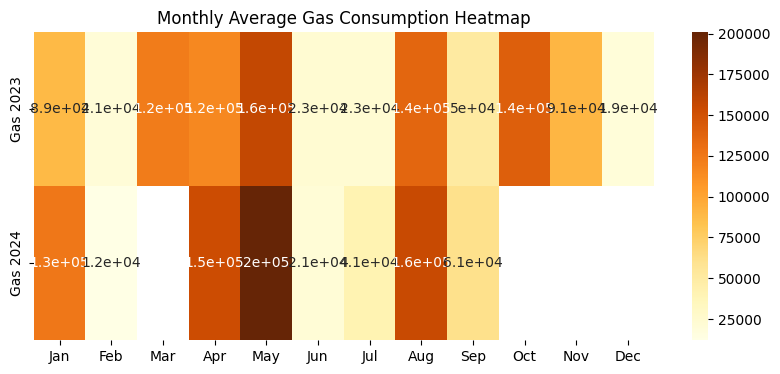

In [ ]:
# Create a 2D array for gas data (2 rows: 2023 and 2024, 12 columns: months)
gas_data = [
    gas_2023_pivot.values.flatten(),
    gas_2024_pivot.values.flatten()
]

# Heatmap for Gas Consumption (2023 and 2024)
plt.figure(figsize=(10, 4))
sns.heatmap(gas_data, annot=True, cmap="YlOrBr", xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], yticklabels=['Gas 2023', 'Gas 2024'])
plt.title('Monthly Average Gas Consumption Heatmap')
plt.show()